# Import Modules

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/global_twitter_data.json")

# Data Preprocessing


## Read Given Data

In [2]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweets_df = tweets_df_extractor.get_tweet_df()
tweets_df.head()

,created_at,source,full_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy Extra random image I Lets focus ...,-1.250000e-01,0.190625,negative,en,15760,2,i_ameztoy,20497,2621,None,[City],[i_ameztoy],
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info #Chinas media explains the mi...,-1.000000e-01,0.100000,negative,en,6967,201,ZIisq,65,272,None,"[China, Taiwan]",[IndoPac_Info],
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",China even cut off communication they dont anw...,0.000000e+00,0.000000,neutral,en,2166,0,Fin21Free,85,392,None,[XiJinping],[ZelenskyyUa],Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",Putin to #XiJinping I told you my friend Taiwa...,1.000000e-01,0.350000,positive,en,2166,0,Fin21Free,85,392,None,[XiJinping],[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT @ChinaUncensored I’m sorry I thought Taiwan...,-6.938894e-18,0.556250,negative,en,17247,381,VizziniDolores,910,2608,None,[],[ChinaUncensored],"Ayent, Schweiz"


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   full_text           22000 non-null  object 
 3   polarity            22000 non-null  float64
 4   subjectivity        22000 non-null  float64
 5   sentiment           22000 non-null  object 
 6   lang                22000 non-null  object 
 7   favorite_count      22000 non-null  int64  
 8   retweet_count       22000 non-null  int64  
 9   original_author     22000 non-null  object 
 10  followers_count     22000 non-null  int64  
 11  friends_count       22000 non-null  int64  
 12  possibly_sensitive  6191 non-null   object 
 13  hashtags            22000 non-null  object 
 14  user_mentions       22000 non-null  object 
 15  place               22000 non-null  object 
dtypes: f

## Removing Duplicate Rows

In [4]:
from clean_tweets_dataframe import Clean_Tweets
clean_tweets = Clean_Tweets(tweets_df)

Automation in Action...!!!


In [5]:
tweets_df.shape


(22000, 16)

## Remove Non English Tweets

In [6]:
tweets_df = clean_tweets.remove_non_english_tweets(tweets_df)
tweets_df.shape

(22000, 16)

## Manage Missing values


In [7]:
tweets_df.isna().sum()


created_at                0
source                    0
full_text                 0
polarity                  0
subjectivity              0
sentiment                 0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    15809
hashtags                  0
user_mentions             0
place                     0
dtype: int64

## Manage Missing Data


In [8]:
tweets_df['possibly_sensitive'] = tweets_df['possibly_sensitive'].fillna("not_found")
tweets_df.isna().sum()


created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

In [9]:
tweets_df[tweets_df['place'] == ''].shape


(9892, 16)

In [19]:
tweets_df['place'] = tweets_df['place'].fillna("not_known")
tweets_df.isna().sum()

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

## Remove Unwanted Characters


In [10]:
tweets_df = clean_tweets.remove_place_characters(tweets_df)
tweets_df.isna().sum()

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
sentiment             0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

## Convert to Datetime


In [11]:
tweets_df = clean_tweets.convert_to_datetime(tweets_df)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22000 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          22000 non-null  datetime64[ns, UTC]
 1   source              22000 non-null  object             
 2   full_text           22000 non-null  object             
 3   polarity            22000 non-null  float64            
 4   subjectivity        22000 non-null  float64            
 5   sentiment           22000 non-null  object             
 6   lang                22000 non-null  object             
 7   favorite_count      22000 non-null  int64              
 8   retweet_count       22000 non-null  int64              
 9   original_author     22000 non-null  object             
 10  followers_count     22000 non-null  int64              
 11  friends_count       22000 non-null  int64              
 12  possibly_sensitive  22000 non-nu

## Extract device from source text


In [12]:
tweets_df['source'][:10]


0    <a href="http://twitter.com/download/android" ...
1    <a href="http://twitter.com/download/android" ...
2    <a href="http://twitter.com/download/android" ...
3    <a href="http://twitter.com/download/android" ...
4    <a href="http://twitter.com/download/iphone" r...
5    <a href="http://twitter.com/download/android" ...
6    <a href="http://twitter.com/download/android" ...
7    <a href="http://twitter.com/download/android" ...
8    <a href="http://twitter.com/download/android" ...
9    <a href="https://mobile.twitter.com" rel="nofo...
Name: source, dtype: object

In [13]:
tweets_df["source"] = tweets_df["source"].apply(clean_tweets.extract_twitter_source)
tweets_df['source'][:10]

0    Twitter for Android
1    Twitter for Android
2    Twitter for Android
3    Twitter for Android
4     Twitter for iPhone
5    Twitter for Android
6    Twitter for Android
7    Twitter for Android
8    Twitter for Android
9        Twitter Web App
Name: source, dtype: object

## Save Preproccessed Data

In [14]:
tweets_df.to_csv("../data/global_twitter_preprocessed_data.csv", index=False)


# Data Exploration


## Getting Preprocessed data

In [15]:
#It is all about getting some insight and understanding the extracted data.
tweets_df = pd.read_csv("../data/global_twitter_preprocessed_data.csv")


In [17]:
tweets_df.head(5)


,created_at,source,full_text,polarity,subjectivity,sentiment,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-07 22:31:20+00:00,Twitter for Android,RT @i_ameztoy Extra random image I Lets focus ...,-1.250000e-01,0.190625,negative,en,15760,2,i_ameztoy,20497,2621,not_found,['City'],['i_ameztoy'],NaN
1,2022-08-07 22:31:16+00:00,Twitter for Android,RT @IndoPac_Info #Chinas media explains the mi...,-1.000000e-01,0.100000,negative,en,6967,201,ZIisq,65,272,not_found,"['China', 'Taiwan']",['IndoPac_Info'],NaN
2,2022-08-07 22:31:07+00:00,Twitter for Android,China even cut off communication they dont anw...,0.000000e+00,0.000000,neutral,en,2166,0,Fin21Free,85,392,not_found,['XiJinping'],['ZelenskyyUa'],Netherlands
3,2022-08-07 22:31:06+00:00,Twitter for Android,Putin to #XiJinping I told you my friend Taiwa...,1.000000e-01,0.350000,positive,en,2166,0,Fin21Free,85,392,not_found,['XiJinping'],[],Netherlands
4,2022-08-07 22:31:04+00:00,Twitter for iPhone,RT @ChinaUncensored I’m sorry I thought Taiwan...,-6.938894e-18,0.556250,negative,en,17247,381,VizziniDolores,910,2608,not_found,[],['ChinaUncensored'],Ayent Schweiz


In [18]:
# shape of dataframe
tweets_df.shape

(22000, 16)

In [19]:
# general info about null values, data types, columns
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   full_text           22000 non-null  object 
 3   polarity            22000 non-null  float64
 4   subjectivity        22000 non-null  float64
 5   sentiment           22000 non-null  object 
 6   lang                22000 non-null  object 
 7   favorite_count      22000 non-null  int64  
 8   retweet_count       22000 non-null  int64  
 9   original_author     22000 non-null  object 
 10  followers_count     22000 non-null  int64  
 11  friends_count       22000 non-null  int64  
 12  possibly_sensitive  22000 non-null  object 
 13  hashtags            22000 non-null  object 
 14  user_mentions       22000 non-null  object 
 15  place               11510 non-null  object 
dtypes: f

In [20]:
tweets_df.isna().sum()


created_at                0
source                    0
full_text                 0
polarity                  0
subjectivity              0
sentiment                 0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive        0
hashtags                  0
user_mentions             0
place                 10490
dtype: int64

In [21]:
# stats about numerical columns
tweets_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,22000.000000,22000.000000,2.200000e+04,22000.000000,2.200000e+04,22000.000000
mean,0.061312,0.283934,3.791884e+04,177.295636,1.796764e+04,1563.114455
std,0.223658,0.290950,8.952426e+04,498.320518,3.030478e+05,4358.651264
min,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,8.657500e+02,3.000000,5.700000e+01,137.000000
50%,0.000000,0.200000,7.133000e+03,39.000000,2.840000e+02,487.000000
75%,0.133333,0.469048,3.425750e+04,187.000000,1.324500e+03,1599.000000
max,1.000000,1.000000,1.717879e+06,17409.000000,1.449852e+07,208360.000000


## Original authors

In [22]:
tweets_df.original_author.value_counts()


TrumpThuan        116
CGMeifangZhang     65
AarianNewsX        59
Lin73324756        48
Bin20211001        46
                 ... 
papago5             1
pmsxa               1
SomethingThar       1
omotenashi_cx       1
ZeitounRimal        1
Name: original_author, Length: 13433, dtype: int64

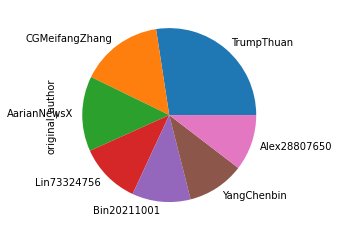

In [23]:
tweets_df.original_author.value_counts().head(7).plot(kind="pie");


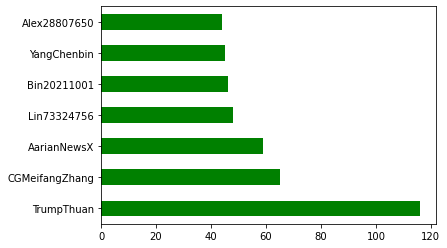

In [52]:
tweets_df.original_author.value_counts().head(7).plot(kind="barh",color='green');


## Place

In [24]:
tweets_df.place.value_counts()

                          246
India                     200
United States             166
Hong Kong                 153
Vit Nam                   118
                         ... 
Makassar Indonesia          1
xx                          1
Lephalale South Africa      1
Occopied Pakistan           1
Gelendzhik                  1
Name: place, Length: 3920, dtype: int64

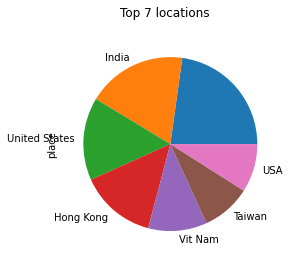

In [25]:
# top 7 locations of users
top_locations = tweets_df.place.value_counts().head(7)
top_locations.plot(kind="pie", subplots=True, title="Top 7 locations");

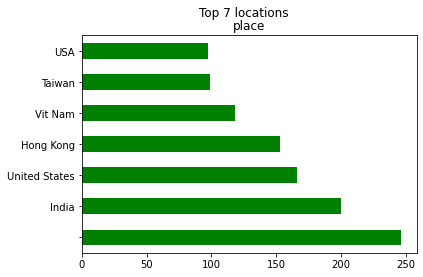

In [54]:
# top 7 locations of users
top_locations = tweets_df.place.value_counts().head(7)
top_locations.plot(kind="barh",color="green", subplots=True, title="Top 7 locations");

## Source

In [26]:
tweets_df["source"].value_counts()


Twitter for Android     8391
Twitter Web App         6791
Twitter for iPhone      5212
Twitter for iPad         634
TweetDeck                171
                        ... 
Twitterrific for Mac       1
Reddit__News               1
Vanprob Retweet            1
Sénégal Retweet            1
NewsNacho                  1
Name: source, Length: 240, dtype: int64

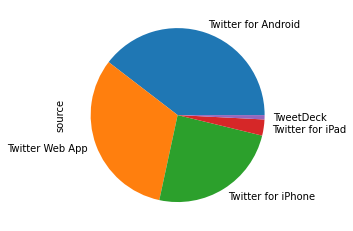

In [27]:
tweets_df["source"].value_counts().head().plot(kind="pie");


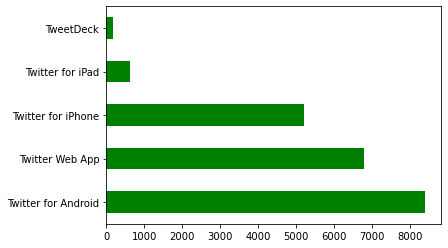

In [55]:
tweets_df["source"].value_counts().head().plot(kind="barh",color="green");


## User mentions


In [28]:
tweets_df["user_mentions"]


0              ['i_ameztoy']
1           ['IndoPac_Info']
2            ['ZelenskyyUa']
3                         []
4        ['ChinaUncensored']
                ...         
21995       ['IndoPac_Info']
21996       ['IndoPac_Info']
21997            ['Reuters']
21998       ['IndoPac_Info']
21999       ['IndoPac_Info']
Name: user_mentions, Length: 22000, dtype: object

In [29]:
# Row values differnet null from user mention columns
user_mentions_list_df = tweets_df.loc[tweets_df["user_mentions"] != " "]
user_mentions_list_df = user_mentions_list_df['user_mentions']
user_mentions_list_df

0              ['i_ameztoy']
1           ['IndoPac_Info']
2            ['ZelenskyyUa']
3                         []
4        ['ChinaUncensored']
                ...         
21995       ['IndoPac_Info']
21996       ['IndoPac_Info']
21997            ['Reuters']
21998       ['IndoPac_Info']
21999       ['IndoPac_Info']
Name: user_mentions, Length: 22000, dtype: object

In [30]:
#create dataframe where each user_mention gets its own row
flattened_user_mentions = []
for user_mentions_list in user_mentions_list_df:
    user_mentions_list = user_mentions_list.split(" ")
    for user_mentions in user_mentions_list:
        flattened_user_mentions.append(user_mentions)
flattened_user_mentions_df = pd.DataFrame(flattened_user_mentions, columns=['user_mentions'])
flattened_user_mentions_df.head()

,user_mentions
0,['i_ameztoy']
1,['IndoPac_Info']
2,['ZelenskyyUa']
3,[]
4,['ChinaUncensored']


In [31]:
flattened_user_mentions_df.value_counts()


user_mentions      
[]                     3302
['IndoPac_Info']       1752
['CGMeifangZhang']     1547
['SpokespersonCHN']    1485
['WilliamYang120']      637
                       ... 
['KuoFernLab']            1
'WSJ',                    1
['KwasiKwarteng']         1
'WPipperger']             1
['FactsofTR']             1
Length: 3653, dtype: int64

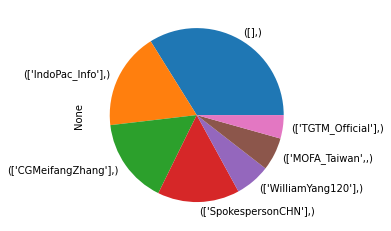

In [32]:
flattened_user_mentions_df.value_counts().head(7).plot(kind="pie");


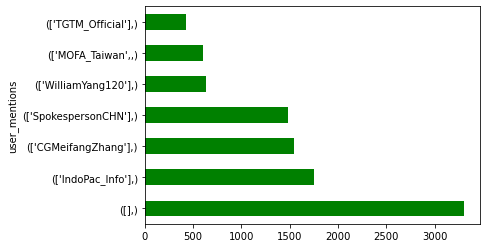

In [56]:
flattened_user_mentions_df.value_counts().head(7).plot(kind="barh",color="green");


## Sentiments


In [33]:
tweets_df['sentiment'].value_counts()


neutral     8980
positive    8187
negative    4833
Name: sentiment, dtype: int64

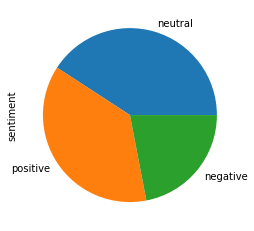

In [34]:
tweets_df["sentiment"].value_counts().plot(kind="pie");


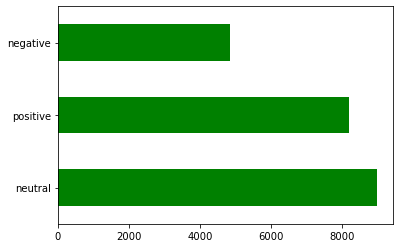

In [51]:
tweets_df["sentiment"].value_counts().plot(kind="barh",color="green");


## Hashtags


In [35]:
tweets_df['hashtags']


0                                        ['City']
1                             ['China', 'Taiwan']
2                                   ['XiJinping']
3                                   ['XiJinping']
4                                              []
                           ...                   
21995    ['China', 'Taiwan', 'ChinaTaiwanCrisis']
21996    ['China', 'Taiwan', 'ChinaTaiwanCrisis']
21997                                  ['Pelosi']
21998                         ['Taiwan', 'China']
21999                         ['Taiwan', 'China']
Name: hashtags, Length: 22000, dtype: object

In [36]:
hashtags_list_df = tweets_df.loc[tweets_df["hashtags"] != " "]
hashtags_list_df = hashtags_list_df['hashtags']
hashtags_list_df

0                                        ['City']
1                             ['China', 'Taiwan']
2                                   ['XiJinping']
3                                   ['XiJinping']
4                                              []
                           ...                   
21995    ['China', 'Taiwan', 'ChinaTaiwanCrisis']
21996    ['China', 'Taiwan', 'ChinaTaiwanCrisis']
21997                                  ['Pelosi']
21998                         ['Taiwan', 'China']
21999                         ['Taiwan', 'China']
Name: hashtags, Length: 22000, dtype: object

In [38]:
flattened_hashtags = []
for hashtags_list in hashtags_list_df:
    hashtags_list = hashtags_list.split(" ")
    for hashtag in hashtags_list:
        flattened_hashtags.append(hashtag)
flattened_hashtags_df = pd.DataFrame(flattened_hashtags, columns=['hashtag'])
flattened_hashtags_df.head()

,hashtag
0,['City']
1,"['China',"
2,'Taiwan']
3,['XiJinping']
4,['XiJinping']


In [39]:
flattened_hashtags_df.value_counts()


hashtag                
['Taiwan']                 4045
'Taiwan']                  3679
'Taiwan',                  3113
['Taiwan',                 2895
[]                         2859
                           ... 
'existentialreckoning']       1
'Jan6th',                     1
'explore',                    1
'Jan6',                       1
'1000x',                      1
Length: 5842, dtype: int64

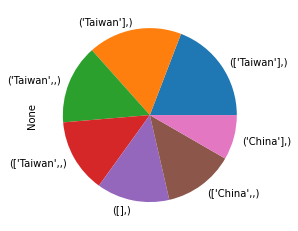

In [40]:
flattened_hashtags_df.value_counts().head(7).plot(kind="pie");


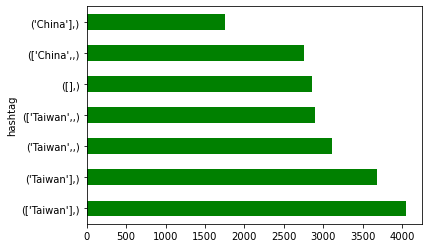

In [57]:
flattened_hashtags_df.value_counts().head(7).plot(kind="barh",color="green");
